In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

import re
import pandas as pd
import time
import requests

희망

In [363]:
driver=webdriver.Chrome()
url='https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=473795728'
driver.get(url)

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [364]:
total_num=soup.select('h5 > span')[0].text
total_num=int(re.sub('[^0-9]','',total_num))
total_num

403

In [366]:
song_number=[]

for idx in range(1,total_num+1,50):
    idx=str(idx)
    print(idx)
    
    driver=webdriver.Chrome()
    url='https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=473795728#params%5BplylstSeq%5D=473795728&po=pageObj&startIndex='+idx
    driver.get(url)

    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    songs=soup.select('div.wrap > a.btn.button_icons.type03.song_info')

    for i in range(len(songs)):
        href=songs[i].attrs['href']
        song_number.append(re.sub('[^0-9]','',href))
    driver.close()

    print(len(song_number),len(set(song_number)))

1
50 50
51
100 100
101
150 150
151
200 200
201
250 250
251
300 300
301
350 350
351
400 400
401
403 403


In [369]:
len(set(song_number))

403

In [371]:
driver=webdriver.Chrome()
lyric_lst=[]
for i in song_number:
    driver.get("https://www.melon.com/song/detail.htm?songId=" + i)
    lyric_lst.append(driver.find_element(By.CLASS_NAME,'lyric').text)

In [372]:
print(len(lyric_lst))
print(lyric_lst[:5])

403
["시작해볼까\n이 시간만을 기다려 왔네\n웃음이 번져\n드디어 우리 마주한 거야\n한동안 널 휘휘 저었던\n졸이고 애태웠던 걱정들\n후후 불어 꿀꺽 삼켰던\n뜨거운 눈물도 모두 던져봐\n오늘은 너의 날이야\n축제는 지금부터야 woo\n잔을 더 높여봐\nhigh up 더 뛰어봐\nfly up 더 날아봐\n오직 널 위해서\n부딪혀볼까\n단숨에 맘이 가벼워지네\n음악에 취해 흐르는 대로\n너를 맡겨봐\n한동안 널 살살 녹였던\n뜸 들여 살 찌웠던 걱정들\n얼음처럼 꽁꽁 얼렸던\n그날의 기억도 모두 던져봐\n오늘은 너의 날이야\n축제는 지금부터야 woo\n잔을 더 높여봐\nhigh up 더 뛰어봐\nfly up 더 날아봐\n오직 널 위해서\nCan't let you go\n오늘뿐이라 해도\n망설이지 말고\nOh Yes let me know\n니가 그리는 대로\n오늘은 너의 날이야\n축제는 지금부터야 woo\n잔을 더 높여봐\nhigh up 더 뛰어봐\nfly up 더 날아봐\n오직 널 위해서\n잊지마 너의 날이야\n축제는 계속될 거야 woo\n소릴 더 높여봐\nfly up 더 날아봐\ndream up 포기 말아\n오직 널 위해서\nUh uh uh\n오직 널 위해서 Your day", '문득 달라진 게 느껴져\n정말 어른이 되고 있어\n내 부족함이 보여도\n더는 내가 별로 안 미워\n오늘 나의 마음보다도\n몇 년 뒤를 떠올리면서\n나는 자주 불안해 했어\n그땐 모든 게 다 그랬어\n난 가끔 그리울 것 같아 어리석었던\n그래서 더 달리고 달렸던 날들\n푸르고 또 푸르던 모습이\n새빨갛게 춤추고 뛰던 가슴도\n난 요즘엔 하늘이 아름다워\n잘 알던 서울이 새삼스러워\n비가오면 그대로 다 맞고 싶어\n애쓰지 않더라도 행복하고 싶어\n문득 떠나고 싶은 날엔\n훌쩍 떠나고 싶은데\n할 일이 먼저 생각나\n꽉 찬 캘린더를 바라봐\n나의 이름으로 쓰여지는 약속들이\n두근거리던 내 주말들을 채우지만\n난 어디로 가는지를 잘 알고 있어\n그래서 더 생각이나\n많이 무모하고 어리

In [375]:
hope_Lyric_dataset=pd.DataFrame({'Lyric':lyric_lst,'label':2})
hope_Lyric_dataset

,Lyric,label
0,시작해볼까\n이 시간만을 기다려 왔네\n웃음이 번져\n드디어 우리 마주한 거야\n한...,2
1,문득 달라진 게 느껴져\n정말 어른이 되고 있어\n내 부족함이 보여도\n더는 내가 ...,2
2,너의 두 눈은\n저 하늘의 별처럼 반짝이고\n저기 가득 찬 저 달처럼\n찬란하게 비...,2
3,고요한 어둠 속에서\n움츠러든 채로\n멍하니 바라본 별은\n유난히 빛나 보여\n손을...,2
4,빛을 잃어가는 마음과는 달리\n채워지는 도시의 별은\n하나둘씩 늘어가고\n자리를 찾...,2
...,...,...
398,Invisible 안갯 속에\n나를 찾아야만 해 Yeah\n작은 불빛 그 희망은\n...,2
399,Mama 걱정하지마\nI'm better now\nI'm better now\nMa...,2
400,왜 한숨이 나는지\n왜 고갤 못 드는 건지\nHmm Hmm 나만 이런 건지\n무거운...,2
401,당신손에 들려있는 반짝거리는\n그것으로 무얼 할 수 있나요\n그게 당신을 행복하게 ...,2


In [379]:
hope_Lyric_dataset.to_csv('./data/hope_Lyric_dataset.csv',encoding='utf-8-sig',index=False)

분노

In [2]:
song_number=[]

url_lst=['https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=457823884',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=457914982',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=486222735#params%5BplylstSeq%5D=486222735&po=pageObj&startIndex=1',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=486222735#params%5BplylstSeq%5D=486222735&po=pageObj&startIndex=51',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=505608994',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=490101618',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=490101618#params%5BplylstSeq%5D=490101618&po=pageObj&startIndex=51',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=423432783']

for url in url_lst:
    driver=webdriver.Chrome()
    driver.get(url)

    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    songs=soup.select('div.wrap > a.btn.button_icons.type03.song_info')

    for i in range(len(songs)):
        href=songs[i].attrs['href']
        song_number.append(re.sub('[^0-9]','',href))
    driver.close()

    print(len(song_number),len(set(song_number)))

20 20
40 40
90 90
94 94
107 106
157 151
159 152


In [7]:
song_number=set(song_number)

In [11]:
driver=webdriver.Chrome()
lyric_lst=[]
cnt=0
for i in song_number:
    url="https://www.melon.com/song/detail.htm?songId="+i
    headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    r=requests.get(url,headers=headers)
    soup=BeautifulSoup(r.text,'html.parser')
    try:
        lyric_lst.append(soup.select('div.lyric')[0].text)
    except:
        cnt+=1
    time.sleep(2)

In [12]:
cnt

24

In [13]:
len(lyric_lst)

150

In [15]:
anger_Lyric_dataset=pd.DataFrame({'Lyrics':lyric_lst,'label':3})
anger_Lyric_dataset

,Lyrics,label
0,\r\n\t\t\t\t\t\t\t폭염에 복면 쓰고불구덩이에 처박힌내 기분을 니들이 ...,3
1,\r\n\t\t\t\t\t\t\tI Pop it off in this game.Ok...,3
2,\r\n\t\t\t\t\t\t\tLet’s burn(No)It’s done (Ars...,3
3,\r\n\t\t\t\t\t\t\t내가 제일 잘 나가내가 제일 잘 나가내가 제일 잘 ...,3
4,\r\n\t\t\t\t\t\t\tWho dat이제야 벗겨지는 veilThanks f...,3
...,...,...
145,\r\n\t\t\t\t\t\t\t반쯤 미쳐가는 나망가져 나의 삶넌 내게서 나를 지워...,3
146,\r\n\t\t\t\t\t\t\t무궁화 꽃이 피었습니다우리 빼고 모두 다 멈춰지담이...,3
147,\r\n\t\t\t\t\t\t\t아예 아예 아예 아예 아예 아예 아예 아예 아예 아...,3
148,\r\n\t\t\t\t\t\t\t난 나쁜 기집애 나난 나쁜 기집애 난 나쁜 기집애...,3


In [16]:
anger_Lyric_dataset.to_csv('./data/anger_Lyric_dataset.csv',encoding='utf-8-sig',index=False)

행복

In [20]:
happy=pd.read_csv('./data/happy_Lyrics_dataset.csv')
print(happy.shape)
happy.head()

(50, 2)


,Lyrics,label
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하...,0
1,라라랄라 라라랄라 워어 워어 너가 맛있었다고 했던 살구빛 샐러드 맛있어서 또 ...,0
2,자꾸 마주치는 네 눈빛에 Baby baby왠지 어색해 대체 왜 이래고개를 숙여봐도너...,0
3,어깨동무까진 괜찮아그치만 손 잡는 건 조금 위험해잘 자란 메세진 괜찮아그래도 자냐는...,0
4,햇살이 가득그댈 향한 가벼운 발걸음콧노래 부르며쇼윈도에 비친내 모습을 한번 점검해시...,0


In [21]:
song_number=[]

url_lst=['https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=429411613#params%5BplylstSeq%5D=429411613&po=pageObj&startIndex=51',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=429411613#params%5BplylstSeq%5D=429411613&po=pageObj&startIndex=101']

for url in url_lst:
    driver=webdriver.Chrome()
    driver.get(url)

    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    songs=soup.select('div.wrap > a.btn.button_icons.type03.song_info')

    for i in range(len(songs)):
        href=songs[i].attrs['href']
        song_number.append(re.sub('[^0-9]','',href))
    driver.close()

    print(len(song_number),len(set(song_number)))

50 50
100 100


In [22]:
driver=webdriver.Chrome()
lyric_lst=[]
cnt=0
for i in song_number:
    url="https://www.melon.com/song/detail.htm?songId="+i
    headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    r=requests.get(url,headers=headers)
    soup=BeautifulSoup(r.text,'html.parser')
    try:
        lyric_lst.append(soup.select('div.lyric')[0].text)
    except:
        cnt+=1
    time.sleep(2)

In [24]:
happy_plus=pd.DataFrame({'Lyrics':lyric_lst,'label':0})
happy_plus

,Lyrics,label
0,\r\n\t\t\t\t\t\t\t두근거린 느낌 가슴 설렌 마음이렇게 난 또 멍하게 ...,0
1,\r\n\t\t\t\t\t\t\t1 2 Come On R U Ready3 4 Do ...,0
2,\r\n\t\t\t\t\t\t\t딱 걸렸어 널 보는 내 눈빛이 무심한 척 잘 숨겨왔...,0
3,\r\n\t\t\t\t\t\t\tYes I’m so sick Because of y...,0
4,\r\n\t\t\t\t\t\t\t옛날 옛적언니들과 계모에게몹시 구박 받던그녀 이름맘...,0
...,...,...
91,\r\n\t\t\t\t\t\t\t니가 날 싫어해 하는 걸 알아나는 서운해 그런 날 ...,0
92,\r\n\t\t\t\t\t\t\t그럴 수 있겠지 it's alright 참아 줄 수...,0
93,\r\n\t\t\t\t\t\t\tWa Wa Yeh! 가식적인 체면 다 모두 다 버리...,0
94,\r\n\t\t\t\t\t\t\t늘 바라만 보네요하루가 지나가고 또 하루가 지나도그...,0


In [27]:
song_number=[]
driver=webdriver.Chrome()
driver.get('https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=429411613#params%5BplylstSeq%5D=429411613&po=pageObj&startIndex=151')

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')
songs=soup.select('div.wrap > a.btn.button_icons.type03.song_info')

for i in range(len(songs)):
    href=songs[i].attrs['href']
    song_number.append(re.sub('[^0-9]','',href))
driver.close()

print(len(song_number),len(set(song_number)))

50 50


In [28]:
driver=webdriver.Chrome()
lyric_lst=[]
cnt=0
for i in song_number:
    url="https://www.melon.com/song/detail.htm?songId="+i
    headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    r=requests.get(url,headers=headers)
    soup=BeautifulSoup(r.text,'html.parser')
    try:
        lyric_lst.append(soup.select('div.lyric')[0].text)
    except:
        cnt+=1
    time.sleep(2)

In [30]:
happy_plus2=pd.DataFrame({'Lyrics':lyric_lst,'label':0})
happy_plus2.head()

,Lyrics,label
0,\r\n\t\t\t\t\t\t\t두 눈에 나의 사랑을 담으러 가요내 맘에 행복이 오...,0
1,\r\n\t\t\t\t\t\t\t달이 차고 내 마음도 차고이대로 담아 두기엔 너무 ...,0
2,\r\n\t\t\t\t\t\t\t사랑을 할거야-우리 이제는 좋아하게 될꺼야지나버린 ...,0
3,\r\n\t\t\t\t\t\t\t아주 아주 오래 전부터내가 널 만나던 그 순간부터너...,0
4,\r\n\t\t\t\t\t\t\t커피 우유 빛 얼굴웃을 때 마다 날 녹이는하트 모양...,0


In [31]:
happy_lyrics=pd.concat([happy,happy_plus,happy_plus2])
happy_lyrics.reset_index(drop=True,inplace=True)
happy_lyrics

,Lyrics,label
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하...,0
1,라라랄라 라라랄라 워어 워어 너가 맛있었다고 했던 살구빛 샐러드 맛있어서 또 ...,0
2,자꾸 마주치는 네 눈빛에 Baby baby왠지 어색해 대체 왜 이래고개를 숙여봐도너...,0
3,어깨동무까진 괜찮아그치만 손 잡는 건 조금 위험해잘 자란 메세진 괜찮아그래도 자냐는...,0
4,햇살이 가득그댈 향한 가벼운 발걸음콧노래 부르며쇼윈도에 비친내 모습을 한번 점검해시...,0
...,...,...
191,\r\n\t\t\t\t\t\t\t반짝 눈부신 날쨘하고 나타날 것 같아방금 짖궂은 그...,0
192,\r\n\t\t\t\t\t\t\t두근거렸지 누군가 나의 뒤를 쫓고있었고 검은 절벽 ...,0
193,\r\n\t\t\t\t\t\t\t한번도 난 너를 잊어본적 없어오직그대만을 생각했는걸...,0
194,\r\n\t\t\t\t\t\t\tThink about it I UCheck it c...,0


In [32]:
happy_lyrics.to_csv('./data/happy_Lyric_dataset.csv',encoding='utf-8-sig',index=False)

슬픔

In [2]:
song_number=[]
url_lst=['https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=507927254',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=507927254#params%5BplylstSeq%5D=507927254&po=pageObj&startIndex=51',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=507927254#params%5BplylstSeq%5D=507927254&po=pageObj&startIndex=101',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=480011338',
         'https://www.melon.com/mymusic/dj/mymusicdjplaylistview_inform.htm?plylstSeq=480011338#params%5BplylstSeq%5D=480011338&po=pageObj&startIndex=51']

for url in url_lst:
    driver=webdriver.Chrome()
    driver.get(url)

    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    songs=soup.select('div.wrap > a.btn.button_icons.type03.song_info')

    for i in range(len(songs)):
        href=songs[i].attrs['href']
        song_number.append(re.sub('[^0-9]','',href))
    driver.close()

    print(len(song_number),len(set(song_number)))

50 50
100 100
150 150
200 200
250 242


In [3]:
song_number=set(song_number)

In [4]:
driver=webdriver.Chrome()
lyric_lst=[]
cnt=0
for i in song_number:
    url="https://www.melon.com/song/detail.htm?songId="+i
    headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    r=requests.get(url,headers=headers)
    soup=BeautifulSoup(r.text,'html.parser')
    try:
        lyric_lst.append(soup.select('div.lyric')[0].text)
    except:
        cnt+=1
    time.sleep(2)
print(cnt)

0


In [6]:
len(lyric_lst)

242

In [7]:
sad_lyrics=pd.DataFrame({'Lyrics':lyric_lst,'label':1})
print(sad_lyrics.shape)
sad_lyrics.head()

(242, 2)


,Lyrics,label
0,\r\n\t\t\t\t\t\t\t이제는 아무렇지 않겠지우리 함께했던 날들이 찾아와도...,1
1,\r\n\t\t\t\t\t\t\t오랜시간 함께라서 내 친구로 난 너무도 편했었어 이...,1
2,\r\n\t\t\t\t\t\t\t무슨 말을 할까 어디서부터 어떻게고개만 떨구는 나 ...,1
3,\r\n\t\t\t\t\t\t\t지친 하루를 마치고집에 돌아왔을때이상하게 낯선 기분...,1
4,\r\n\t\t\t\t\t\t\t또 늦은 건 나야 널 기다리게 한 건네가 웃는 순간...,1


In [8]:
sad_lyrics.to_csv('./data/sad_Lyric_dataset.csv',encoding='utf-8-sig',index=False)

최종데이터셋

In [9]:
happy=pd.read_csv('./data/happy_Lyric_dataset.csv')
happy

,Lyrics,label
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하...,0
1,라라랄라 라라랄라 워어 워어 너가 맛있었다고 했던 살구빛 샐러드 맛있어서 또 ...,0
2,자꾸 마주치는 네 눈빛에 Baby baby왠지 어색해 대체 왜 이래고개를 숙여봐도너...,0
3,어깨동무까진 괜찮아그치만 손 잡는 건 조금 위험해잘 자란 메세진 괜찮아그래도 자냐는...,0
4,햇살이 가득그댈 향한 가벼운 발걸음콧노래 부르며쇼윈도에 비친내 모습을 한번 점검해시...,0
...,...,...
191,\r\n\t\t\t\t\t\t\t반짝 눈부신 날쨘하고 나타날 것 같아방금 짖궂은 그...,0
192,\r\n\t\t\t\t\t\t\t두근거렸지 누군가 나의 뒤를 쫓고있었고 검은 절벽 ...,0
193,\r\n\t\t\t\t\t\t\t한번도 난 너를 잊어본적 없어오직그대만을 생각했는걸...,0
194,\r\n\t\t\t\t\t\t\tThink about it I UCheck it c...,0


In [10]:
sad=pd.read_csv('./data/sad_Lyric_dataset.csv')
sad

,Lyrics,label
0,\r\n\t\t\t\t\t\t\t이제는 아무렇지 않겠지우리 함께했던 날들이 찾아와도...,1
1,\r\n\t\t\t\t\t\t\t오랜시간 함께라서 내 친구로 난 너무도 편했었어 이...,1
2,\r\n\t\t\t\t\t\t\t무슨 말을 할까 어디서부터 어떻게고개만 떨구는 나 ...,1
3,\r\n\t\t\t\t\t\t\t지친 하루를 마치고집에 돌아왔을때이상하게 낯선 기분...,1
4,\r\n\t\t\t\t\t\t\t또 늦은 건 나야 널 기다리게 한 건네가 웃는 순간...,1
...,...,...
237,\r\n\t\t\t\t\t\t\t사랑한다 말하고 보고 싶다 말하고많은 걸 약속하고 ...,1
238,\r\n\t\t\t\t\t\t\t때 이른 봄 몇 송이 꺾어다너의 방 문 앞에 두었어...,1
239,\r\n\t\t\t\t\t\t\t당신이란 사람 정말 몸서리처질정도로 끔찍하네요언제까...,1
240,\r\n\t\t\t\t\t\t\t이별하는 가을의 밤은 무릇 아파 정말 많이 사랑했단...,1


In [11]:
hope=pd.read_csv('./data/hope_Lyric_dataset.csv')
hope.rename(columns={'Lyric':'Lyrics'},inplace=True)
hope

,Lyrics,label
0,시작해볼까\n이 시간만을 기다려 왔네\n웃음이 번져\n드디어 우리 마주한 거야\n한...,2
1,문득 달라진 게 느껴져\n정말 어른이 되고 있어\n내 부족함이 보여도\n더는 내가 ...,2
2,너의 두 눈은\n저 하늘의 별처럼 반짝이고\n저기 가득 찬 저 달처럼\n찬란하게 비...,2
3,고요한 어둠 속에서\n움츠러든 채로\n멍하니 바라본 별은\n유난히 빛나 보여\n손을...,2
4,빛을 잃어가는 마음과는 달리\n채워지는 도시의 별은\n하나둘씩 늘어가고\n자리를 찾...,2
...,...,...
398,Invisible 안갯 속에\n나를 찾아야만 해 Yeah\n작은 불빛 그 희망은\n...,2
399,Mama 걱정하지마\nI'm better now\nI'm better now\nMa...,2
400,왜 한숨이 나는지\n왜 고갤 못 드는 건지\nHmm Hmm 나만 이런 건지\n무거운...,2
401,당신손에 들려있는 반짝거리는\n그것으로 무얼 할 수 있나요\n그게 당신을 행복하게 ...,2


In [12]:
anger=pd.read_csv('./data/anger_Lyric_dataset.csv')
anger

,Lyrics,label
0,\r\n\t\t\t\t\t\t\t폭염에 복면 쓰고불구덩이에 처박힌내 기분을 니들이 ...,3
1,\r\n\t\t\t\t\t\t\tI Pop it off in this game.Ok...,3
2,\r\n\t\t\t\t\t\t\tLet’s burn(No)It’s done (Ars...,3
3,\r\n\t\t\t\t\t\t\t내가 제일 잘 나가내가 제일 잘 나가내가 제일 잘 ...,3
4,\r\n\t\t\t\t\t\t\tWho dat이제야 벗겨지는 veilThanks f...,3
...,...,...
145,\r\n\t\t\t\t\t\t\t반쯤 미쳐가는 나망가져 나의 삶넌 내게서 나를 지워...,3
146,\r\n\t\t\t\t\t\t\t무궁화 꽃이 피었습니다우리 빼고 모두 다 멈춰지담이...,3
147,\r\n\t\t\t\t\t\t\t아예 아예 아예 아예 아예 아예 아예 아예 아예 아...,3
148,\r\n\t\t\t\t\t\t\t난 나쁜 기집애 나난 나쁜 기집애 난 나쁜 기집애...,3


In [13]:
hope=hope.sample(200,replace=False,random_state=111)
sad=sad.sample(200,replace=False,random_state=111)
df=pd.concat([happy,sad,hope,anger])
df.reset_index(drop=True,inplace=True)
df

,Lyrics,label
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하...,0
1,라라랄라 라라랄라 워어 워어 너가 맛있었다고 했던 살구빛 샐러드 맛있어서 또 ...,0
2,자꾸 마주치는 네 눈빛에 Baby baby왠지 어색해 대체 왜 이래고개를 숙여봐도너...,0
3,어깨동무까진 괜찮아그치만 손 잡는 건 조금 위험해잘 자란 메세진 괜찮아그래도 자냐는...,0
4,햇살이 가득그댈 향한 가벼운 발걸음콧노래 부르며쇼윈도에 비친내 모습을 한번 점검해시...,0
...,...,...
741,\r\n\t\t\t\t\t\t\t반쯤 미쳐가는 나망가져 나의 삶넌 내게서 나를 지워...,3
742,\r\n\t\t\t\t\t\t\t무궁화 꽃이 피었습니다우리 빼고 모두 다 멈춰지담이...,3
743,\r\n\t\t\t\t\t\t\t아예 아예 아예 아예 아예 아예 아예 아예 아예 아...,3
744,\r\n\t\t\t\t\t\t\t난 나쁜 기집애 나난 나쁜 기집애 난 나쁜 기집애...,3


In [14]:
df.to_csv('./data/Lyrics.csv',encoding='utf-8-sig',index=False)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='label', ylabel='count'>

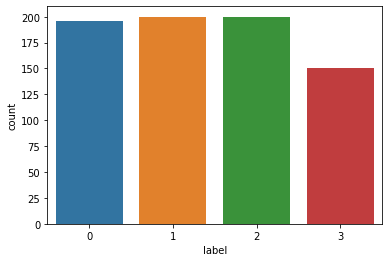

In [16]:
sns.countplot(x='label',data=df)

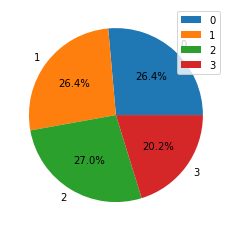

In [17]:
ratio=df['label'].value_counts()/df.shape[0]
ratio=ratio.sort_index()
labels=range(0,4)
plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.legend()